- Supervised machine learning is one of the mostcommonly used and successful types of machine learning.

- Last chapter: classifying iris flowers into several species using physical measurements of the flowers.

### Remember that supervised learning is used whenever we want to predict a certainoutcome from a given input, and we have examples of input-output pairs. We build a machine learning model from these input-output pairs, which comprise our training set. 


## Our goal is to make accurate predictions to new, never-before seen data.

- Supervised learning often requires human effort to build the training set, but afterwards automates and often speeds up an otherwise laborious or infeasible task.

# 2.1 Classification and Regression


 - There are two major types of supervised machine learning algorithms, called classification and regression.
 
 - In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities.
 
 - Classification is sometimes separated intobinary classification, which is the special case of distinguishing between exactly two classes, and multi-class classification which is classificaFItion between more than two classes.
 
  - In binary classification we often speak of one class being the positive classand the other class being the negative class. Here, positive don't represent benefit or value, but rather what the object of study is. So when looking for spam, “positive”could mean the spam class. Which of the two classes is called positive is often a subjective manner, and specific to the domain.
  
  
## For regression tasks, the goal is to predict a continuous number, or a floating point number in programming terms (a real number in mathematical terms).

## An easy way to distinguish between classification and regression tasks is to ask whether there is some kind of ordering or continuity in the output.

### If there is an ordering, or a continuity between possible outcomes, then the problem is a regression problem.

 - Think about predicting annual income. There is a clear ordering of “making moremoney” or “making less money”. There is a natural understanding that 40.000 \$ per year is between 50.000 \$ per year and 30.000 \$ per year. There is also a continuity in the output. Whether a person makes 40,000 \$ or 40,001\$ a year does not make a tangible difference, even though they are different amounts of money. So if our algorithm predicts 39,999 \$ or 40,001\$ when it should have predicted 40,000$$, we don’t mind that much.

# 2.2 Generalization, Overfitting and Underfitting 

- In supervised learning, we want to built a model on the training data, and then beable to make accurate predictions on new, unseen data, that has the same characteristicsas the training set that we used. If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set.

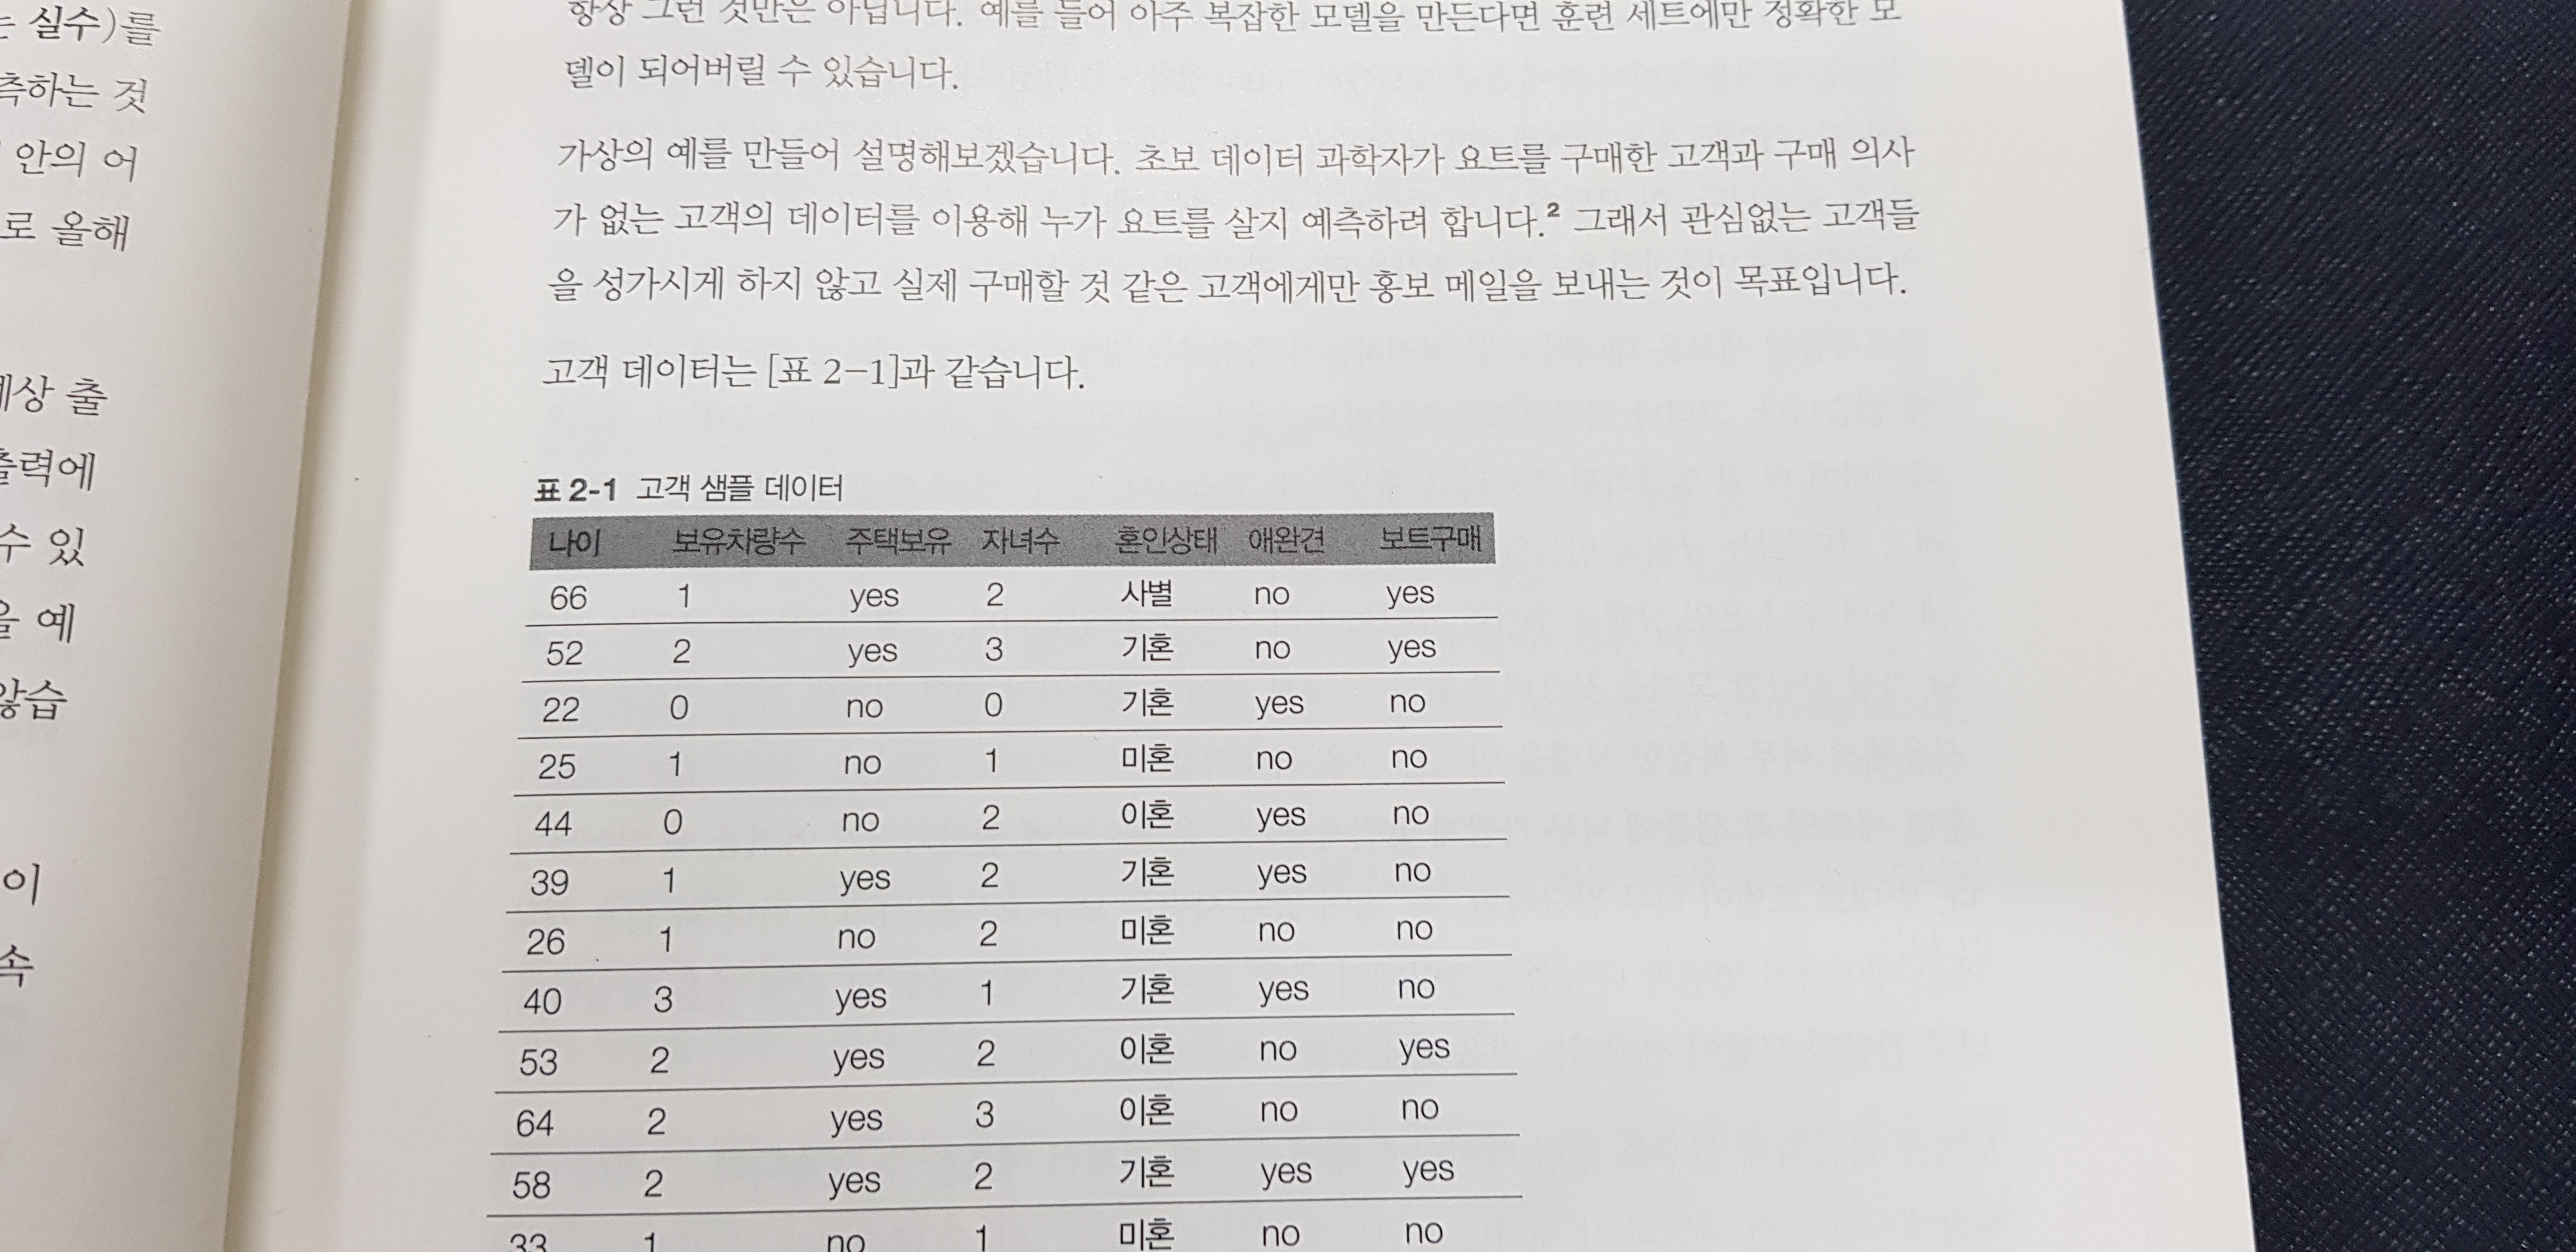

In [1]:
from IPython.display import Image 
Image(filename ='image.jpg')

 - "45세 이상이고 자녀가 셋 미만이면 이혼하지 않은 고객은 요트를 살 것입니다."
 
 - 데이터에 국한이 되면 모델이 정확함.
 
 - 중요한 것은 이 데이터셋만 사용하지 않음.
 
 - 새로운 고객을 볼때, 이사람이 보트를 구입할 것인가 ? 
 
 - 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상됨.
 
 - "50세 이상인 사람은 보트를 사려고 한다"라는 새로운 규칙을 만들었다면, 자녀수나 혼인상태를 추가한 규칙을 더 신뢰.
 
## 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 과대 적합(Overfitting)이라고 함.

 - 과대적합은 모델이 훈련센트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어남.
 
 - 반대로 모델이 너무 간단하면, 즉 "집이 있는 사람은 모두 요트를 사려고 한다."와 같은 경우에는 데이터의 면면과 다양성을 잡아내지 못할 것이고, 훈련세트에도 잘 맞지 않음.
 
 - 너무 간단한 모델이 선택되는 것을 과소적합(UnderFitting)이라고 함.

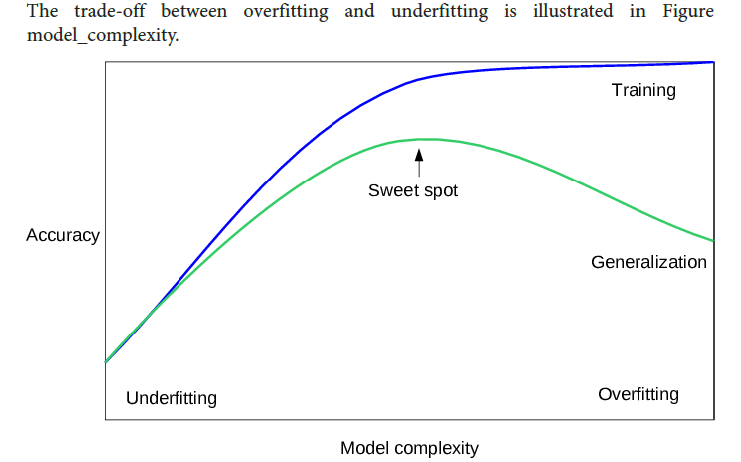

In [2]:
from IPython.display import Image 
Image(filename ='image1.png')

## 2.2.1 모델 복잡도와 데이터셋 크기의 관계

 - 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊습니다. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 업이 더 복잡한 모델을 만들 수 있음. 
 
 - 데이터를 더 많이 수집하고 적절하게 더 복잡한 모델을 만들면 지도 학습 문제에서 종종 놀라운 결과를 얻을수 있음.
 
 - 데이터양의 힘을 과소평가하지 마세요.
 
 
# Supervised Machine Learning Algorithms

- We will now go through the most popular machine learning algorithms and explainhow they learn from data and how they make predictions. We will also discuss how the concept of model complexity plays out for each of these models.




- We will also discuss strength and weaknesses of each algorithm, and what kind ofdata they can be best applied to. We will also explain the meaning of the most importantparameters and options. Discussing all of them is beyond the scope of the book, and we refer you to the scikit-learn documentation for more details.


### An example of a synthetic two-class classification dataset is the forge dataset, which has two features.

X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


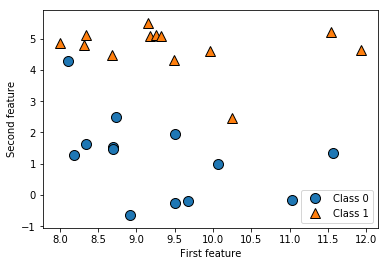

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

To illustrate regression algorithms, we will use the synthetic wave dataset shown below. The wave dataset only has a single input feature, and a continuous target variable (or response) that we want to model.

Text(0,0.5,'Target')

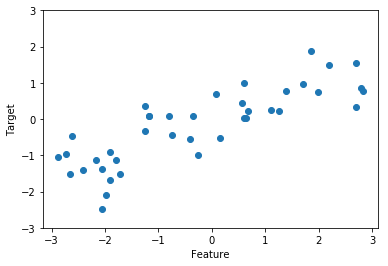

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## We are using these very simple, low-dimensional datasets as we can easily visualizethem -- a computer monitor has two dimensions, so data with more than two featuresis hard to show. Any intuition derived from datasets with few features (alsocalled low-dimensional datasets) might not hold in datasets with many features (highdimensional datasets). As long as you keep that in mind, inspecting algorithms on low-dimensional datasets can be very instructive.

## We will complement these small synthetic dataset with two real-world datasets that are included in scikit-learn. One is the Wisconsin breast cancer dataset (or cancer for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


All you need to know about Bunch objects is that they behave like dictionaries, withthe added benefit that you can access values using a dot (as in bunch.key instead of bunch['key']).

In [6]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

# https://wikidocs.net/32

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We will also be using a real-world regression dataset, the Boston Housing dataset.


The task associated with this dataset is to predict the median value of homes in several\Boston neighborhoods in the 1970s, using information about the neighborhoods such as crime rate, proximity to the Charles River, highway accessibility and so on.

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


 - For our purposes here, we will actually expand this dataset, by not only consideringthese 13 measurements as input features, but also looking at all products (also called interactions) between features.
 
 - In other words, we will not only consider crime rate and highway accessibility as afeature, but also the product of crime rate and highway accessibility. Includingderived feature like these is called feature engineering, which we will discuss in more detail in Chapter 5 (Representing Data).

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


The resulting 105 features are the 13 original features, the 13 choose 2 = 91 (Footnote:the number of ways to pick 2 elements out of 13 elements) features that are product of two features, and one constant feature.

# 2.3.2 k-Nearest Neighbor 

 - The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning algorithm.
 
 - To make aprediction for a new data point, the algorithm finds the closest data points in the training dataset, it “nearest neighbors”.
 
 ## k-Neighbors Classification
 
  - In its simplest version, the algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.
  
  - The prediction is then simply the known output for this training point.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


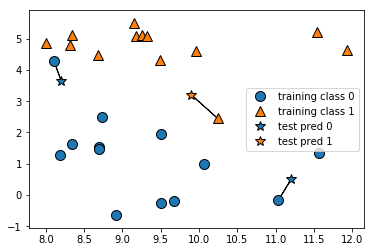

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


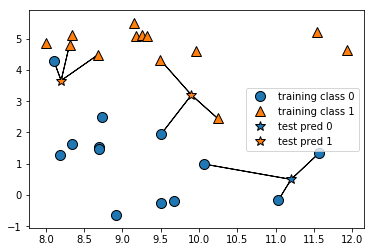

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Instead of considering only the closest neighbor, we can also consider an arbitrarynumber $k$ of neighbors

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


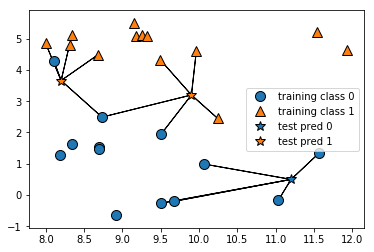

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

Now let’s look at how we can apply the $k$ nearest neighbors algorithm using scikitlearn.

First, we split our data into a training and a test set, so we can evaluate generalization performance, as discussed in Chapter 1(Introduction).

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Next we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to three.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# https://en.wikipedia.org/wiki/Minkowski_distance


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the predict method. This computes the nearest neighbors in the training set and finds the most common class among these:

In [17]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

In [18]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [20]:
clf.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# https://en.wikipedia.org/wiki/Minkowski_distance


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [22]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


# Analyzing KNeighborsClassifier

- For two-dimensional datasets, we can also illustrate the prediction for all possible test point in the xy-plane

- This lets us view the decision boundary,which is the divide between where the algorithm assigns class red versus where it assigns class blue

- Here is a visualization of the decision boundary for one, three and five neighbors: 

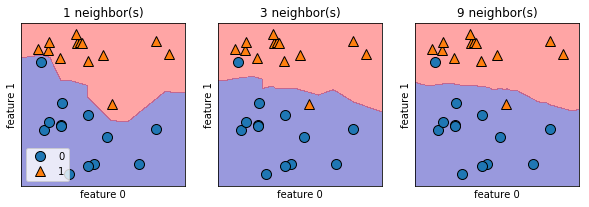

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

 - As you can see in the left figure, using a single neighbor results in a decision boundarythat follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary.
 
 - In other words, using few neighbors corresponds to high model complexity(as shown on the right side of Figure model_complexity), and using many neighbors corresponds to low model complexity (as shown on the left side of Figure model_complexity).
 
  - Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed above.

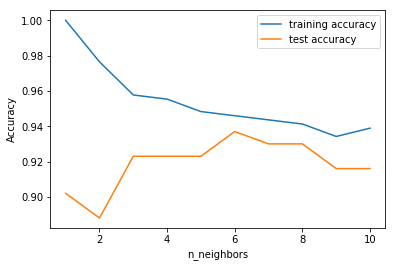

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

While the real world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting.

# k-Neighbors Regression

 - There is also a regression variant of the k-nearest neighbors algorithm.
 - This time using the wave dataset.

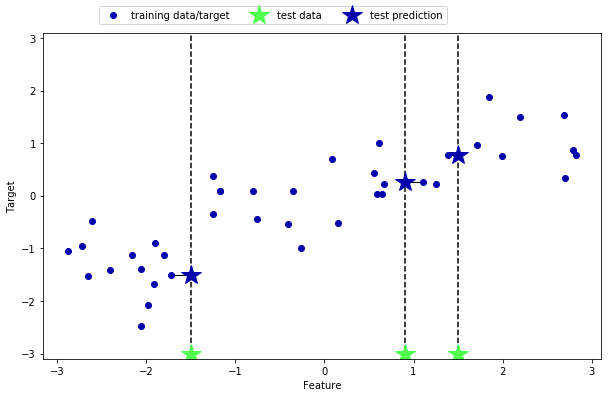

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

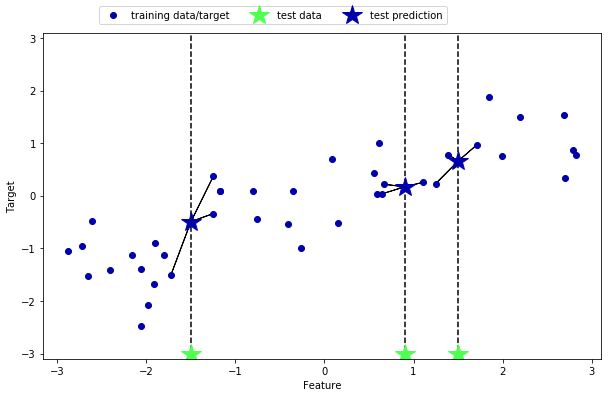

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [28]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


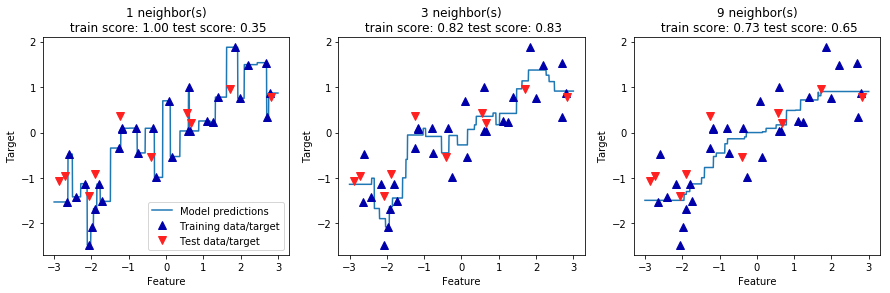

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")


# http://www.fairlynerdy.com/what-is-r-squared/
# https://en.wikipedia.org/wiki/Coefficient_of_determination

## Strengths, weaknesses and parameters

 - In principal, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points.
 
 -  You should certainly adjust this parameter.
 
 - One of the strengths of nearest neighbors is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments.  
  
  
 - Building the nearest neighbors model is usually very fast, but when your trainingset is very large (either in number of features or in number of samples) prediction can be slow. 
 
 - Nearest neighbors often does not perform well on dataset with very many features, in particular sparse datasets, a common type of data in which there are many features, but only few of the features are non-zero for any given data point.
 
 ## 2.3.2Linear Models
 
 - Linear models are models that make a prediction that using a linear function of the input features, which we will explain below.
 
### Linear models for regression

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b \text{ (1) linear regression}
\end{align*}


# https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

# https://brownmath.com/stat/leastsq.htm

# https://medium.com/@purnasaigudikandula/linear-regression-in-python-with-cost-function-and-gradient-descent-bde9a8d2626

# https://brunch.co.kr/@gimmesilver/18

w[0]: 0.393906  b: -0.031804


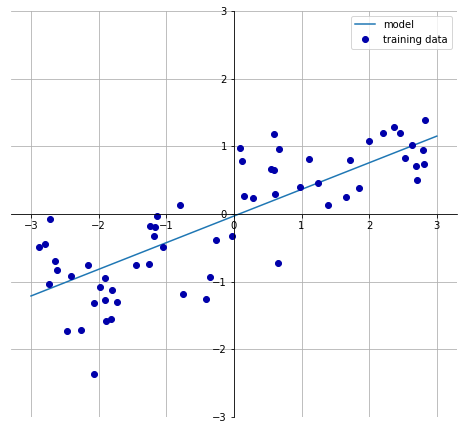

In [31]:
mglearn.plots.plot_linear_regression_wave()

 - Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is when having more features).
 
  - If you compare the predictions made by the red line with those made by the KNeighborsRegressorin Figure nearest_neighbor_regression, using a straight line to make predictions seems very restrictive.
  
   - It looks like all the fine details of the data are lost.
   
   - For datasets with many features, linear models can be very powerful.
   
   - There are many different linear models for regression. The difference between thesemodels is how the model parameters $w$ and $b$ are learned from the training data, and how model complexity can be controlled. We will now go through the most popular linear models for regression.

# Linear Regression aka Ordinary Least Squares

*Linear regression or Ordinary Least Squares (OLS) is the simplest and most classic linear method for regression.* 



 - Linear regression finds the parameters $w$ and $b$ that minimize the mean squaredn error between predictions and the true regression targets $y$ on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values


 *Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.*

In [32]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters w, also called weights or coefficients are stored in the coef_ attribute, while the offset or intercept b is stored in the intercept_ attribute. [Footnote:you might notice the strange-looking trailing underscore]

In [33]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The intercept_ attribute is always a single float number, while the coef_ attribute is a numpy array with one entry per input feature. As we only have a single input feature in the wave dataset, lr.coef_ only has a single entry.

In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An $R^2$ of around .66 is not very good, but we can see that the score on trainingand test set are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as themodel is very simple (or restricted).
 - Let’s take a look at how LinearRegression performs on a more complex dataset, likethe Boston Housing dataset. Remember that this dataset has 506 samples and 105 derived features.

In [35]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


 - This is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.
 
 - One of the most commonly used alternatives to standard linear regression is Ridge regression, which we will look into next.

# Ridge regression

 - Ridge regression is also a linear model for regression, so the formula it uses to make predictions is still Formula (1), as for ordinary least squares.
 
  - In Ridge regression,the coefficients w are chosen not only so that they predict well on the training data, but there is an additional constraint.
  
  - We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to 0.
  
   - Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.
   
   - Regularization meansexplicitly restricting a model to avoid overfitting. The particular kind used by Ridgeregression is known as l2 regularization. [footnote: Mathematically, Ridge penalizes the l2 norm of the coefficients, or the Euclidean length of w.]
   
   
   # https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.886058
test set score: 0.752714


 - As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher.
 
 - With linear regression, we were overfitting to our data. Ridge is a more restricted model, so we are less likely to overfit.
 
  - A less complex model means worse performance on the training set, but better generalization.

In [38]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64
